In [1]:
from astrosceni.image import Image
from astrosceni.stars_filter import StarsFilter
from astrosceni.mufinder import MuFinder
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#hipparcus_filter = StarsFilter(data_directory_path="SCENI/data") #Default
#tycho_filter = StarsFilter(data_directory_path="SCENI/data") #Custom

# hipparcus_filter.setCatalogue(star_id_col_name = "HIP")
# print(hipparcus_filter.getCatalogue())
# tycho_filter.setCatalogue(catalogue_id="I/259/tyc2", star_id_col_name = "TYC", ra_col_name="RA(ICRS)", dec_col_name="DE(ICRS)", app_mag_col_name="VTmag")
# print(tycho_filter.getCatalogue())

In [3]:
# nb = Image('SCENI/data/bs_h_ave_wcs.fits')
# bb = Image('SCENI/data/bs_r_ave_wcs.fits')

# nb.cropPixels(50, -50, 50, -50)
# bb.cropPixels(50, -50, 50, -50)

# print(nb.checkSaturatedPixelCount(saturated_ratio_lim=0.001))
# nb.setSaturatedPixelsToNan()
# print(nb.checkSaturatedPixelCount(saturated_ratio_lim=0.001))

# nb.setSaturatedPixelsToNan()
# bb.setSaturatedPixelsToNan()

# nb.cropPixels(x_start = 800)

In [4]:
# filter = StarsFilter()
# filter.setStarsInRegion(nb)
# print(filter.getStarsInRegion())
# filter.setVisibleStars(nb)
# print(filter.getVisibleStars())
# nb.setLabeledStars(filter)

# Testing the zoomToStar function under the image class.

In [5]:
nbImg = Image("SCENI/data/bs_h_ave_wcs.fits")
bbImg = Image("SCENI/data/bs_r_ave_wcs.fits")
starsFilter = StarsFilter(data_directory_path = 'SCENI/data')

starsFilter.setCatalogue(catalogue_id="I/239/hip_main", star_id_col_name = "HIP", ra_col_name = "_RA.icrs", dec_col_name = "_DE.icrs", app_mag_col_name = "Vmag")
print(starsFilter.getCatalogue())

print("custom region: ", starsFilter.custom_region)
print("catalogue_set: ", starsFilter.catalogue_set)

Previous saved catalog file found.
                RA        DEC  Vmag  starID
0         0.000899   1.089009  9.10       1
1         0.004265 -19.498840  9.27       2
2         0.005024  38.859279  6.61       3
3         0.008629 -51.893546  8.06       4
4         0.009973 -40.591202  8.55       5
...            ...        ...   ...     ...
118213  359.963738  11.673714  6.99  118318
118214  359.974304 -22.428113  8.23  118319
118215  359.976109   5.956552  7.59  118320
118216  359.979458 -64.372313  9.20  118321
118217  359.979078 -65.577132  4.49  118322

[118218 rows x 4 columns]
custom region:  False
catalogue_set:  True


In [6]:
starsFilter.setStarsInRegion(nbImg)
starsFilter.setStarsInRegion(bbImg)

print(starsFilter.getStarsInRegion())
print(starsFilter.getStarsInRegion().shape)

starsFilter.setVisibleStars(nbImg)
starsFilter.setVisibleStars(bbImg)
#print(starsFilter.getVisibleStars())
#print(starsFilter.getVisibleStars().shape)


               RA        DEC   Vmag  starID     x_pixels     y_pixels
90751  277.959867 -15.182680   7.29   90834  1969.918172     0.528651
90805  278.088825 -16.222659   8.39   90888  1960.516895   588.426214
90814  278.113751 -15.932036   8.32   90897  1930.262945   427.729570
90824  278.157473 -15.701639   7.85   90907  1893.353075   301.671428
90856  278.258437 -16.560188   6.97   90939  1889.210879   786.195650
90935  278.508625 -17.540027   8.48   91018  1813.369692  1345.981225
91029  278.782845 -16.985536   7.10   91112  1634.138862  1052.934468
91048  278.835813 -16.140804   7.76   91131  1555.030824   585.727305
91163  279.174414 -17.206821   7.84   91246  1438.988295  1198.613540
91168  279.198003 -15.945465   7.01   91251  1349.156324   498.264763
91260  279.464871 -17.231285   6.78   91343  1286.061893  1229.167575
91331  279.653249 -16.310071   7.75   91414  1128.299083   728.286179
91365  279.760498 -15.039268   7.48   91448   991.204176    27.595256
91498  280.137948 -1

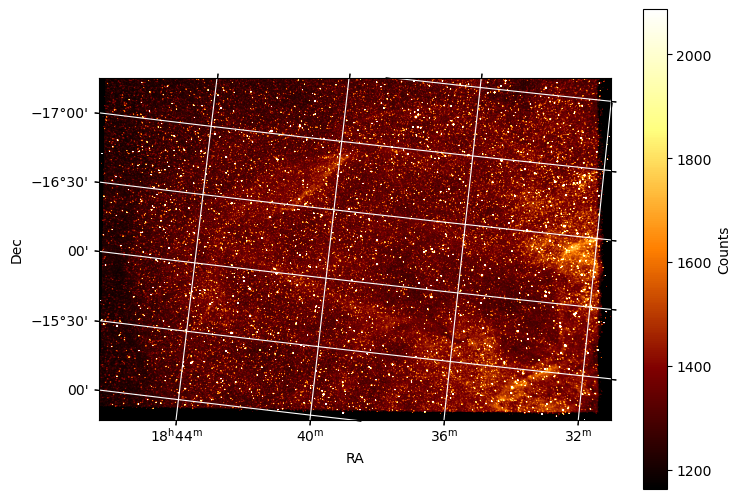

(1392, 2080)

In [7]:
nbImg.plot()
nbImg.getImageData().shape

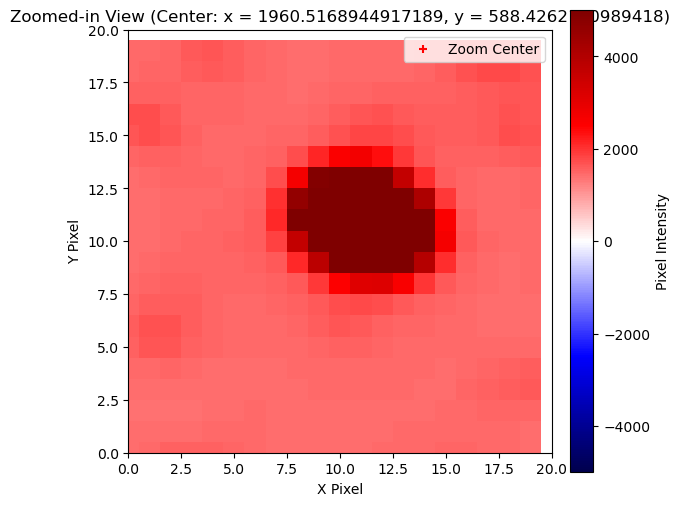

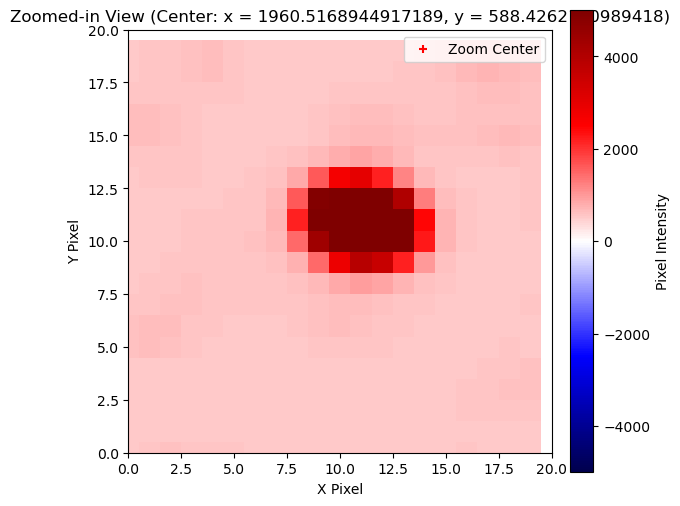

In [8]:
# newImg.zoomToStar(catalogue_df=starsFilter.getCatalogue(), star_id = 118318, zoom_size=50, custom_cmap="seismic", custom_vmin=-5000, custom_vmax=5000)
nbImg.zoomToStar(catalogue_df=starsFilter.getCatalogue(), star_id = 90888, zoom_size=10, custom_cmap="seismic", custom_vmin=-5000, custom_vmax=5000)
bbImg.zoomToStar(catalogue_df=starsFilter.getCatalogue(), star_id = 90888, zoom_size=10, custom_cmap="seismic", custom_vmin=-5000, custom_vmax=5000)

### Checking if star is at least mostly removed with the optimal mu

[[ 5.54765344e+02  5.54765344e+02  5.54765344e+02  6.34423542e+02
   6.21408817e+02  5.66467252e+02  4.69841100e+02  3.55818959e+02
   2.34899977e+02  1.21005830e+02  2.81142005e+01 -4.84365234e+01
  -1.04584223e+02 -1.36749686e+02 -1.59932014e+02 -1.65378816e+02
  -1.66340822e+02 -1.56699341e+02 -1.47678412e+02 -1.33085967e+02
  -1.20053150e+02 -1.06873313e+02 -9.09886650e+01 -8.36437112e+01
  -6.72039172e+01 -6.17911125e+01 -5.06573809e+01 -4.46206312e+01
  -3.63963932e+01 -3.14784737e+01 -2.78289548e+01 -2.04793324e+01
  -2.11152731e+01 -1.37882730e+01 -1.49014086e+01 -9.28286455e+00
  -1.12313298e+01 -5.41615512e+00 -7.48913964e+00 -4.83904964e+00
  -4.52677023e+00 -1.83956838e+00 -4.58098003e+00 -2.89046276e-01
  -1.36922407e+00 -4.63365141e+00  4.13111220e+00 -4.26442848e+00
   1.83370151e+00 -8.17132204e-01  3.94867909e-01 -6.90331680e-02
  -8.12041501e-01  3.31719917e+00 -2.23048779e+00  1.44491440e+00
   1.82395372e+00 -1.46101353e+00  2.63348786e+00 -7.53262727e-01
   1.07286

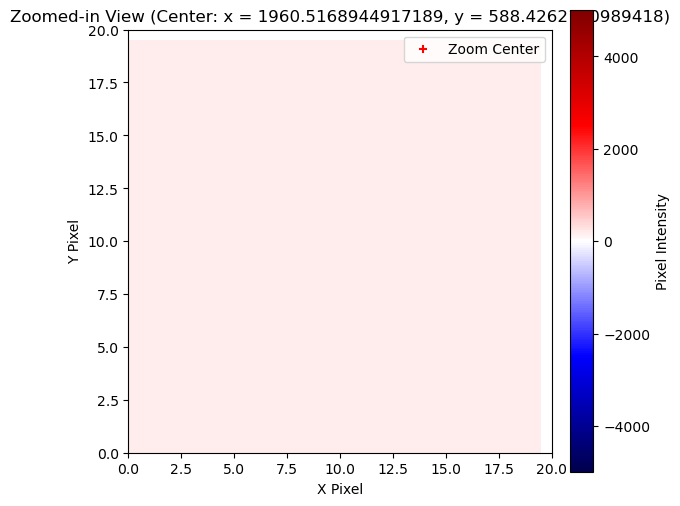

In [9]:
mufinder = MuFinder(nbImg, bbImg, mu_resolution = 0.05)
optimal_mus = mufinder.getOptimalMus()

filtered_nb = starsFilter.filterStars(nbImg)
filtered_bb = starsFilter.filterStars(bbImg)

resultImg = Image.subtract(filtered_nb, filtered_bb, optimal_mus[0])
resultImg.zoomToStar(catalogue_df=starsFilter.getCatalogue(), star_id = 90888, zoom_size=10, custom_cmap="seismic", custom_vmin=-5000, custom_vmax=5000)

In [10]:
type(optimal_mus)

numpy.ndarray